In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [94]:
df=pd.read_csv('covid.csv')
df.head(5)

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [95]:
le=LabelEncoder()
pc=le.fit_transform(df['pc'].values)
wbc=le.fit_transform(df['wbc'].values)
mc=le.fit_transform(df['mc'].values)
ast=le.fit_transform(df['ast'].values)
ldh=le.fit_transform(df['ldh'].values)
y=le.fit_transform(df['diagnosis'].values)

In [96]:
x=np.array(list(zip(pc,wbc,mc,ast,ldh)))

In [97]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=10)

In [98]:
model= MultinomialNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [99]:
print("accuracy: ",accuracy_score(ytest,ypred))
print("classification report: ",classification_report(ytest,ypred))

accuracy:  0.6
classification report:                precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [100]:
lr_proba=model.predict_proba(xtest)
positives=lr_proba[:,1]
fpr,tpr,_=roc_curve(ytest,positives)

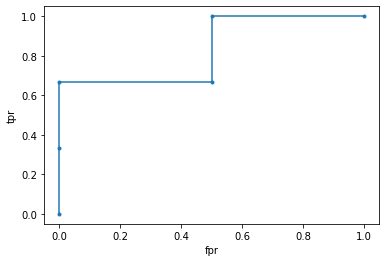

In [92]:
plt.plot(fpr,tpr,marker=".")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()